Numerical variables

The values of a numerical variable are numbers. They can be further classified into discrete and continuous variables. Discrete numerical variable

A variable which values are whole numbers (counts) is called discrete. For example, the number of items bought by a customer in a supermarket is discrete. The customer can buy 1, 25, or 50 items, but not 3.7 items. It is always in the form of integer number not to float number. The following are examples of discrete variables:

Number of active bank accounts of a borrower (1, 4, 7, ...)
Number of pets in the family
Number of children in the family
number of cars 

Continuous numerical variable

A variable that may contain any value within some range is called continuous. For example, the total amount paid by a customer in a supermarket is continuous. The customer can pay, GBP 20.5, GBP 13.10, GBP 83.20 and so on. Other examples of continuous variables are:

House price (in principle, it can take any value) (GBP 350000, 57000, 1000000, ...)
Time spent surfing a website (3.4 seconds, 5.10 seconds, ...)
Total debt as percentage of total income in the last month (0.2, 0.001, 0, 0.75, ...)



In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/lending-club-loan-data/database.sqlite
/kaggle/input/lending-club-loan-data/LCDataDictionary.xlsx
/kaggle/input/lending-club-loan-data/loan.csv


In [3]:
# let's load the dataset with just a few columns and a few rows
# to speed things up

use_cols = [
    'loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'loan_status',
    'open_il_12m'
]

data = pd.read_csv(
    '../input/lending-club-loan-data/loan.csv', usecols=use_cols).sample(
        10000, random_state=44)  # set a seed for reproducibility

data.head()

loan_amnt  int_rate  annual_inc  loan_status  open_acc  open_il_12m
70642        12000     10.33    115000.0      Current      10.0          2.0
490788       20000     11.99     19200.0      Current       9.0          0.0
2081591      35000     18.25    153619.0  Charged Off      27.0          NaN
900431        8000      7.99     67000.0   Fully Paid      10.0          1.0
781582       17000      9.16     50000.0   Fully Paid       9.0          0.0

Continuous VariablesÂ¶

In [4]:
# let's look at the values of the variable loan_amnt
# this is the amount of money requested by the borrower
# in US dollars

data.loan_amnt.unique()

array([12000, 20000, 35000,  8000, 17000, 14000, 10000, 40000,  9000,
       16000, 15000,  1500, 22000,  4000, 12800, 17100,  6600, 16250,
        3575,  6000, 10200,  3825, 21600,  7000, 10925,  4800, 25000,
       18325, 15025,  7150,  9600,  8400,  7500, 16125,  2000, 28100,
       29000,  6400, 22800, 20800, 11325,  5000,  8575, 19125, 30400,
        2800, 11875,  3600,  8500,  9800, 21000, 30800, 27225,  1450,
       36000,  3500, 22650, 23550,  3300, 19200, 34975, 14400,  4475,
        2300, 24000, 11000, 30000,  5400, 10400,  8850, 12375, 13600,
       24875, 36425,  2400, 15600, 18900,  9875, 28000, 15225, 18000,
        7200,  2500, 13975, 11075, 10975, 19000,  3200,  4500, 11200,
       13000, 18500, 14125,  7325, 16800, 22150,  2700, 21900,  4900,
        8250,  9500,  3000, 27625,  1600, 32000, 13550, 10550, 23000,
       21550, 13500, 32350, 20875, 14925, 19500, 11150, 17025,  7800,
        1200, 10050, 21100,  8725, 10850, 13200, 20700, 26000, 19600,
       11500,  1000,

Text(0, 0.5, 'Number of Loans')

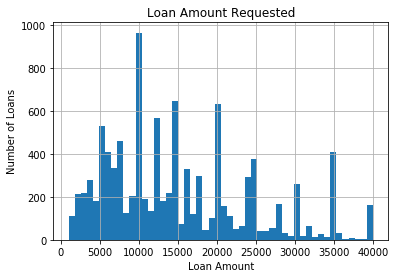

In [5]:
 # let's make an histogram to get familiar with the
# distribution of the variable

fig = data.loan_amnt.hist(bins=50)
fig.set_title('Loan Amount Requested')
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Number of Loans')



The values of the variable vary across the entire range of the variable. This is characteristic of continuous variables.

The taller bars correspond to loan sizes of 10000, 15000, 20000, and 35000. There are more loans disbursed for those loan amount values. This indicates that most people tend to ask for these loan amounts. Likely, these particular loan amounts are pre-determined and offered as such in the Lending Club website.

Less frequent loan values, like 23,000 or 33,000 could be requested by people who require a specific amount of money for a definite purpose.


In [6]:
# let's do the same exercise for the variable interest rate,
# which is charged by lending club to the borrowers

data.int_rate.unique()

array([10.33, 11.99, 18.25,  7.99,  9.16,  8.39, 16.91,  9.92, 11.39,
        7.59, 15.31, 16.55,  9.93, 12.99,  7.26, 11.06, 10.99, 11.49,
       12.29,  9.17,  8.46,  6.49, 12.62,  8.19,  7.49, 15.59, 11.44,
       13.99, 17.97, 10.08, 13.67, 13.49, 13.59, 27.79, 15.96, 15.99,
       13.35,  6.89, 19.92, 20.39,  9.99, 15.61,  6.67,  7.89, 18.99,
       21.85, 12.69, 21.98, 11.47, 15.05, 12.12,  9.67,  6.11, 18.49,
       16.29,  7.97, 14.09, 14.65, 14.33, 10.91, 16.01, 16.78, 12.73,
       17.99, 22.2 ,  8.24, 10.56, 22.99, 14.49, 15.1 ,  6.62, 14.42,
        5.32, 14.08, 14.99,  8.81, 21.99,  5.31, 12.39,  9.71, 11.55,
        6.99, 15.49, 22.95, 26.3 , 11.03,  7.07,  7.21, 17.57, 22.35,
       23.88, 24.49, 30.17, 16.02, 20.75, 10.16, 10.42,  9.43, 25.83,
        7.84, 18.94,  9.44, 19.99, 15.04, 16.99, 17.27,  9.49, 24.08,
        8.9 , 30.99, 11.48, 14.72, 17.86,  7.34, 16.14,  8.99, 22.4 ,
        6.83,  5.93, 11.98,  8.08, 18.06, 13.56, 14.46, 10.15, 11.22,
       21.  , 21.49,

Text(0, 0.5, 'Number of Loans')

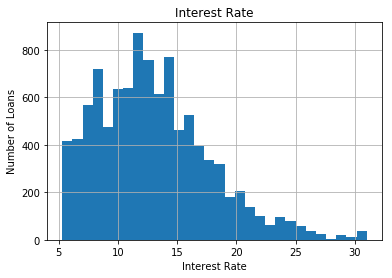

In [7]:
# let's make an histogram to get familiar with the
# distribution of the variable

fig = data.int_rate.hist(bins=30)
fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rate')
fig.set_ylabel('Number of Loans')

Here , we saw that the values of the variable vary continuously across the variable range.

Text(0, 0.5, 'Number of Customers')

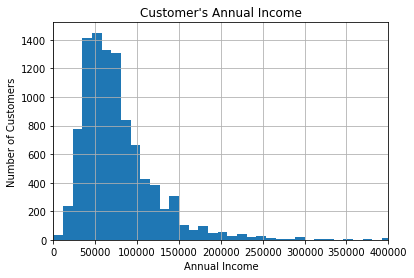

In [8]:
# and now,let's explore the income declared by the customers,
# that is, how much they earn yearly.

fig = data.annual_inc.hist(bins=100)
fig.set_xlim(0, 400000)
fig.set_title("Customer's Annual Income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

The majority of salaries are concentrated towards values in the range 30-70 k, with only a few customers earning higher salaries. Again, the values of the variable, vary continuosly across the variable range.


**Discrete Variables**

Let's explore the variable "Number of open credit lines in the borrower's credit file" (open_acc in the dataset). This is, the total number of credit items (for example, credit cards, car loans, mortgages, etc) that is known for that borrower. By definition it is a discrete variable, because a borrower can have 1 credit card, but not 3.5 credit cards.


In [9]:
# let's inspect the values of the variable

data.open_acc.dropna().unique()

array([10.,  9., 27., 12.,  5., 19., 11., 14.,  8., 24., 15.,  7., 26.,
       22., 18., 21., 16., 17., 25., 23.,  4.,  6., 30.,  3., 31., 13.,
       28., 20., 29., 37.,  1., 35., 36., 44.,  2., 34., 39., 33., 32.,
       38., 40., 47., 46., 48., 43.,  0., 56., 42.])

Text(0, 0.5, 'Number of Customers')

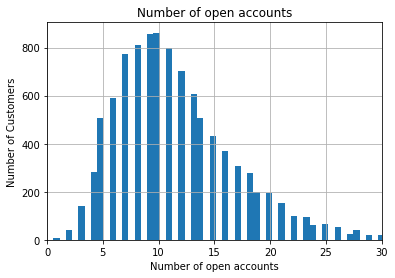

In [10]:
# let's make an histogram to get familiar with the
# distribution of the variable

fig = data.open_acc.hist(bins=100)
fig.set_xlim(0, 30)
fig.set_title('Number of open accounts')
fig.set_xlabel('Number of open accounts')
fig.set_ylabel('Number of Customers')



Histograms of discrete variables have this typical broken shape, as not all the values within the variable range are present in the variable. As I said, the customer can have 3 credit cards, but not 3,5 credit cards.

Let's look at another example of a discrete variable in this dataset: Number of installment accounts opened in past 12 months (open_il_12m in the dataset). Installment accounts are those that at the moment of acquiring them, there is a set period and amount of repayments agreed between the lender and borrower. An example of this is a car loan, or a student loan. The borrower knows that they are going to pay a certain, fixed amount over for example 36 months.


In [11]:
# let's inspect the variable values

data.open_il_12m.unique()

array([ 2.,  0., nan,  1.,  3.,  5.,  4.,  6.,  7.])

Text(0, 0.5, 'Number of Borrowers')

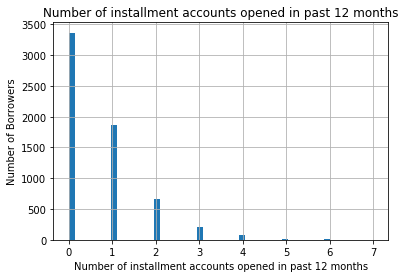

In [12]:
# let's make an histogram to get familiar with the
# distribution of the variable

fig = data.open_il_12m.hist(bins=50)
fig.set_title('Number of installment accounts opened in past 12 months')
fig.set_xlabel('Number of installment accounts opened in past 12 months')
fig.set_ylabel('Number of Borrowers')

The majority of the borrowers have none or 1 installment account, with only a few borrowers having more than 2.


**A variation of discrete variables: the binary variable******************

Binary variables, are discrete variables, that can take only 2 values, therefore binary.

In the next cells I will create an additional variable, called defaulted, to capture the number of loans that have defaulted. A defaulted loan is a loan that a customer has failed to re-pay and the money is lost.

The variable takes the values 0 where the loans are ok and being re-paid regularly, or 1, when the borrower has confirmed that will not be able to re-pay the borrowed amount.


In [13]:
# let's inspect the values of the variable loan status

data.loan_status.unique()

array(['Current', 'Charged Off', 'Fully Paid',
       'Does not meet the credit policy. Status:Fully Paid',
       'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [14]:
# let's create one additional variable called defaulted.
# This variable indicates if the loan has defaulted, which means,
# if the borrower failed to re-pay the loan, and the money
# is deemed lost.

data['defaulted'] = np.where(data.loan_status.isin(['Default']), 1, 0)
data.defaulted.mean()

0.0

In [15]:
# the new variable takes the value of 0
# if the loan is not defaulted

data.head(10)

loan_amnt  int_rate  annual_inc  loan_status  open_acc  open_il_12m  \
70642        12000     10.33    115000.0      Current      10.0          2.0   
490788       20000     11.99     19200.0      Current       9.0          0.0   
2081591      35000     18.25    153619.0  Charged Off      27.0          NaN   
900431        8000      7.99     67000.0   Fully Paid      10.0          1.0   
781582       17000      9.16     50000.0   Fully Paid       9.0          0.0   

         defaulted  
70642            0  
490788           0  
2081591          0  
900431           0  
781582           0

In [16]:
# the new variable takes the value 1 for loans that
# are defaulted

data[data.loan_status.isin(['Default'])].head()

Empty DataFrame
Columns: [loan_amnt, int_rate, annual_inc, loan_status, open_acc, open_il_12m, defaulted]
Index: []

In [17]:
# A binary variable, can take 2 values. For example,
# the variable defaulted that we just created:
# either the loan is defaulted (1) or not (0)

data.defaulted.unique()

array([0])

Text(0, 0.5, 'Number of Loans')

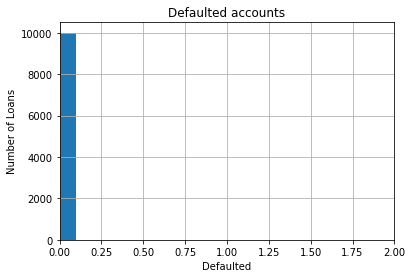

In [18]:
# let's make a histogram, although histograms for
# binary variables do not make a lot of sense

fig = data.defaulted.hist()
fig.set_xlim(0, 2)
fig.set_title('Defaulted accounts')
fig.set_xlabel('Defaulted')
fig.set_ylabel('Number of Loans')



As we can see, the variable shows only 2 values, 0 and 1, and the majority of the loans are ok.

That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.
